#   DSA 210 PROJECT   #

## **Project Title:**  
Analyzing Worker Performance in Teknosan Machining Co. Based on Experience Levels

## **Researcher:**  
Arda Şevket Akgül
## **Course & Term:**  
DSA 210 - Introduction to Data Science  
Spring 2024-2025  

---

## **Project Overview**  
This project aims to analyze worker performance data at Teknosan Machining Co. using various data analyzing techniques. The objective is to explore how worker experience levels correlate with productivity and defect rates through visual representations. The project will involve data cleaning, exploratory analysis, and graphical interpretations to present meaningful insights.

---
## **Motivation**

This project aims to analyze operational performance data from a manufacturing company to understand the factors that influence worker productivity. The analysis focuses on how experience levels and work conditions relate to efficiency metrics.

In addition to being an academic exercise, the findings of this project are intended to be presented to company stakeholders. The goal is to provide actionable insights that can support data-driven decisions to improve workforce management and operational effectiveness.


---

## **Data Sources**  
### **Primary Dataset: Worker Performance Data**  
- Collected from Teknosan Machining Co.  
- Contains variables such as:  
  - Worker ID  
  - Shift Type (Day/Night)  
  - Work Hours  
  - Productivity Metrics (Parts Produced, Defect Rates)  
  - Machine Usage
   
   Note: To preserve privacy and ensure ethical data handling worker names were anonymized using generic identifiers such as id1,id2...
    

### **Supportive Dataset(used for enrichment): Worker Experience Data**  
- Collected from Teknosan Machining Co.  
- Contains variables such as:  
  - Years of experience
  
  Note: The years of experience variable was not provided in exact form due to privacy or organizational constraints. Instead, it was shared in rounded multiples. While this limits the granularity of the analysis, it still allows meaningful group comparisons such as low, medium, and high experience levels.
  

These datasets will be analyzed and visualized to identify trends and patterns in relation to worker experience.

---



## **Research Question & Hypothesis**  

### **Hypothesis1: The Impact of Worker Experience on Defect Rates**  
**H₀ (Null Hypothesis): Worker experience has no significant impact on defect rates.  
**H₁ (Alternative Hypothesis): More experienced workers produce fewer defects.  

### **Hypothesis2: The Impact of Shift Type on Defect Rates**
**H₀ (Null Hypothesis): Shift type has no significant impact on defect rates.  
**H₁ (Alternative Hypothesis): Night-shift workers produce with higher defect rates.



## **Analysis Plan**  
### **1. Data Collection & Cleaning **  
- Verify data completeness and consistency  
- Handle missing values & outliers  

### **2. Exploratory Data Analysis (EDA) & Visualization**  
- Clean the data and make it ready to analyze
- Visualize trends in worker experience vs. defect rates  
- Generate scatter plots, histograms, and bar charts  
- Create heatmaps and correlation matrices to explore relationships
  

***I performed exploratory data analysis to better understand the structure and patterns in the dataset. Several visualizations were created.***

**Fixing CSV Conversion Issues**

When I first converted the Excel files to CSV, there were some issues caused by extra elements in the original files such as company logos, headers, or empty formatting areas. These non-data parts were being read into the dataframe, which caused unexpected columns filled with 0s or NaN values.

To fix this, I cleaned the CSV files by removing those extra rows and columns manually. After cleaning, the dataset became consistent and ready for analysis. This step was important to make sure that the EDA and all calculations were based on valid and meaningful data only.









**Summary Statistics**

To get a general understanding of the dataset, I calculated summary statistics such as mean, standard deviation, minimum and maximum values for the numeric variables. This gives a basic overview of how the data is distributed and if there are any extreme values.
              Summary Statistics



|        | day | shift | machine_number | processed_quantity | material_error | labor_error | efficiency | years_of_experience |
|--------|-----|-------|----------------|--------------------|----------------|-------------|------------|---------------------|
| count  | 54  | 54    | 54             | 54                 | 54             | 54          | 54         | 54                  |
| mean   | 5.76| 1.80  | 91.87           | 129.98              | 0.15           | 0.44        | 94.27      | 3.10                |
| std    | 7.09| 0.76  | 18.98           | 98.77               | 0.53           | 1.79        | 20.55      | 2.22                |
| min    | 1.00| 1.00  | 60.00           | 14.00               | 0.00           | 0.00        | 62.50      | 0.50                |
| 25%    | 2.00| 1.00  | 82.25           | 85.75               | 0.00           | 0.00        | 80.00      | 2.00                |
| 50%    | 2.00| 2.00  | 90.00           | 105.00              | 0.00           | 0.00        | 94.02      | 2.50                |
| 75%    | 8.00| 2.00  | 109.00          | 147.50              | 0.00           | 0.00        | 106.81     | 4.00                |
| max    | 21.00| 3.00 | 117.00          | 606.00              | 3.00           | 12.00       | 173.14     | 10.00               |


(From the summary, I noticed that most workers have a similar range of efficiency values, and the number of processed quantities varies a lot between workers.)





In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr, spearmanr
import seaborn as sns
import numpy as np


# veriyi yükledim
def load_data():
    production_data = pd.read_csv('TEKNOSAN_DATA.csv', delimiter=';')
    experience_data = pd.read_csv('teknosan_worker_experience.csv', delimiter=';')


    production_data.columns = production_data.columns.str.strip()

    # Virgülleri noktaya çevirip sayıya çevir( MLler string gibi okuyup batırıyodu)
    numeric_cols = ['adjustment_data', 'work_time', 'pause_time', 'efficiency']
    for col in numeric_cols:
        production_data[col] = production_data[col].astype(str).str.replace(',', '.', regex=False).astype(float)

    #  setleri birleştir
    merged_data = pd.merge(production_data, experience_data,
                           left_on='worker_name', right_on='worker_id', how='inner')
    return merged_data

# Tecrübeye göre ayır
def add_experience_group(data):
    exp_groups = []
    for years in data['years_of_experience']:
        if years <= 5:
            exp_groups.append('Low')
        else:
            exp_groups.append('High')
    data['experience_group'] = exp_groups
    return data

#  Veriyi hazırla
df = load_data()
df = add_experience_group(df)

# istatistikler
print(df.describe())















             day      shift  machine_number  adjustment_data  work_time  \
count  54.000000  54.000000       54.000000        54.000000  54.000000   
mean    5.759259   1.796296       91.870370        20.916667   6.393519   
std     7.086887   0.761816       18.983654         9.196877   1.152931   
min     1.000000   1.000000       60.000000         4.500000   0.500000   
25%     2.000000   1.000000       82.250000        16.000000   6.000000   
50%     2.000000   2.000000       90.000000        20.000000   7.000000   
75%     8.000000   2.000000      109.000000        25.000000   7.000000   
max    21.000000   3.000000      117.000000        50.000000   7.000000   

       pause_time  processed_quantity  material_error  labor_error  \
count   54.000000           54.000000       54.000000    54.000000   
mean     0.365741          129.981481        0.148148     0.444444   
std      0.667141           98.772751        0.528701     1.787447   
min      0.000000           14.000000       

**Correlation Matrix in Efficiency Dataset**


To understand if other numeric variables affect worker productivity, I created a simple correlation matrix. I checked how efficiency is related to work time, pause time, and processed quantity.For example, if the correlation between pause time and efficiency is negative, it makes sense because more breaks might lower productivity. The matrix shows the strength and direction of these relationships.

Most of the correlations were weak, meaning there is no very strong linear relationship between efficiency and these factors. This shows that productivity might depend on other variables that were not included in this dataset such as experience.
                     

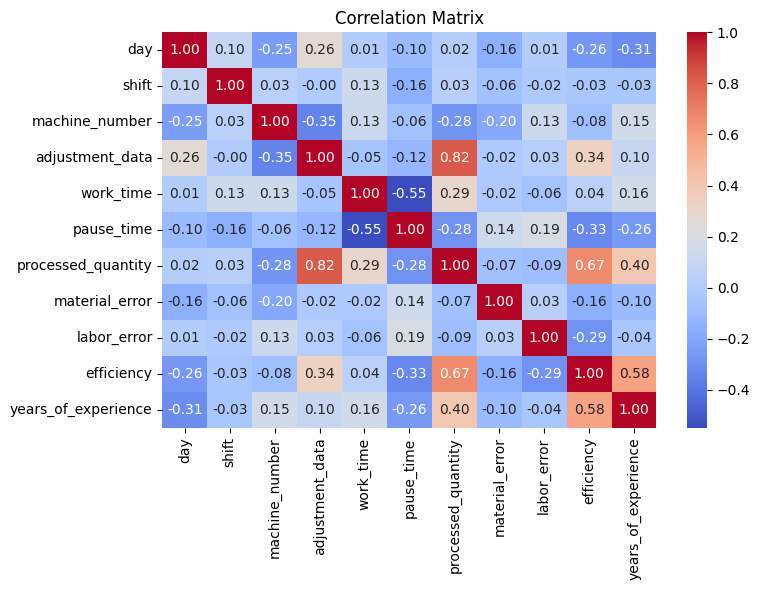

In [9]:
# Korelasyon Matrisi


numeric_df = df.select_dtypes(include=['float64', 'int64'])  # sayısal sütunları seç
corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**Distribution of Efficiency**


I created a histogram to see how efficiency values are spread across all workers. This visualization helps understand the overall distribution of productivity. It shows if most workers are around the average efficiency, and if there are any workers who are extremely efficient or inefficient compared to others. It is a good way to spot outliers and understand the general performance level in the company.

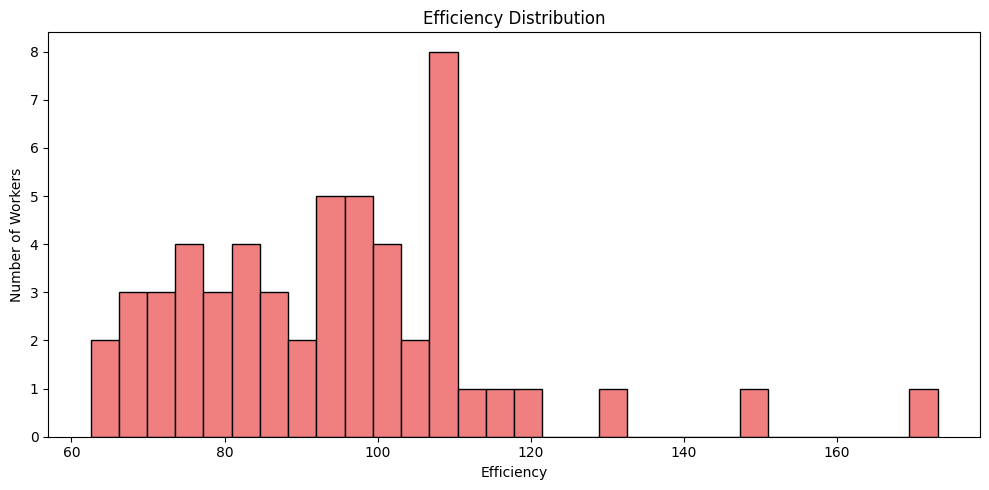

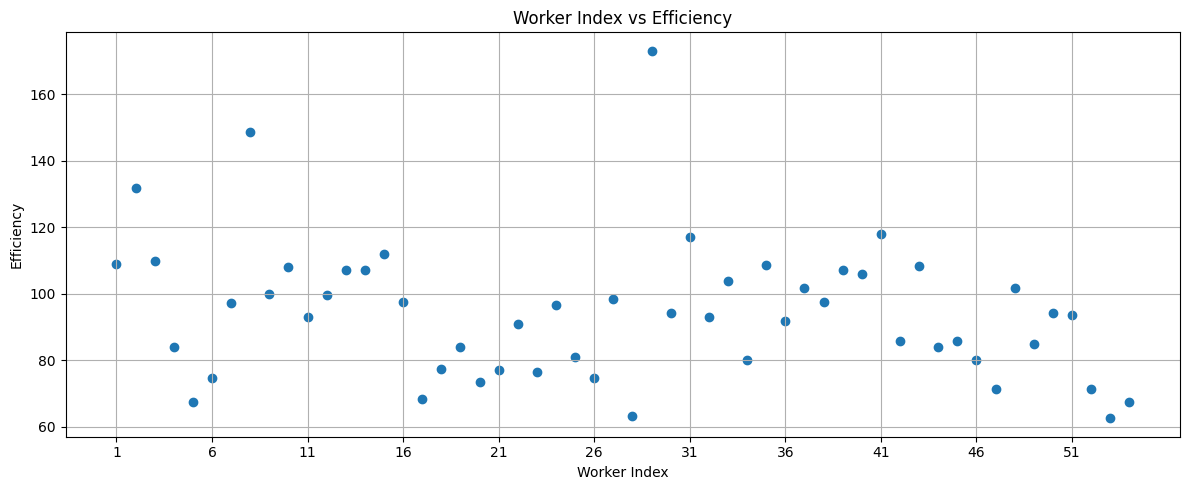

Average efficiency by experience group:
experience_group
High    117.445556
Low      89.637111
Name: efficiency, dtype: float64


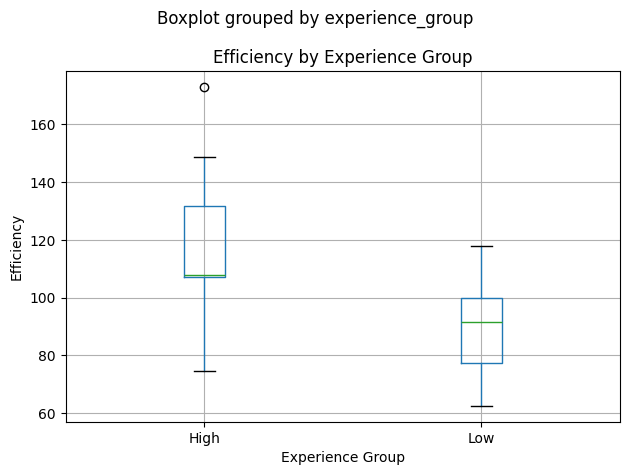

T-test result:
t-stat: -2.7744186999659854
p-value: 0.9890183549168486
 No significant difference found.


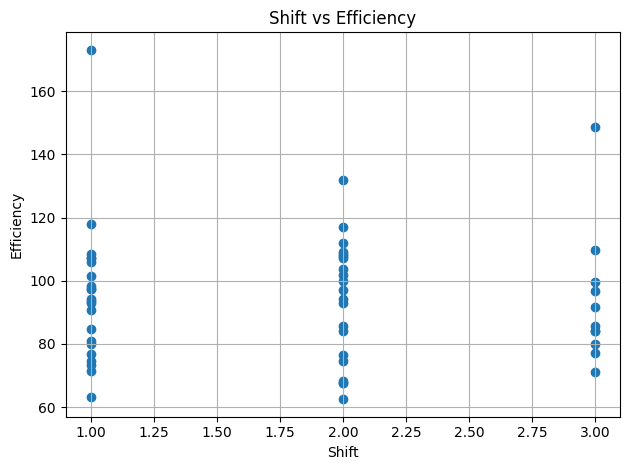

Pearson correlation: -0.03135458251066431 p = 0.821923119845979
Spearman correlation: -0.02290926472634862 p = 0.8693923420141445
 No significant correlation between shift and efficiency.


In [10]:
# 4 histogram
plt.figure(figsize=(10, 5))
plt.hist(df['efficiency'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Efficiency Distribution')
plt.xlabel('Efficiency')
plt.ylabel('Number of Workers')
plt.grid(False)
plt.tight_layout()
plt.show()

  **Worker by Worker Efficiency**
  
  
  I wanted to visualize how efficient each worker is, one by one. In this scatter plot, every point represents a single worker. I sorted them by order in the dataset and plotted their efficiency scores. This helps to see which workers are much higher or lower than the others in terms of productivity.


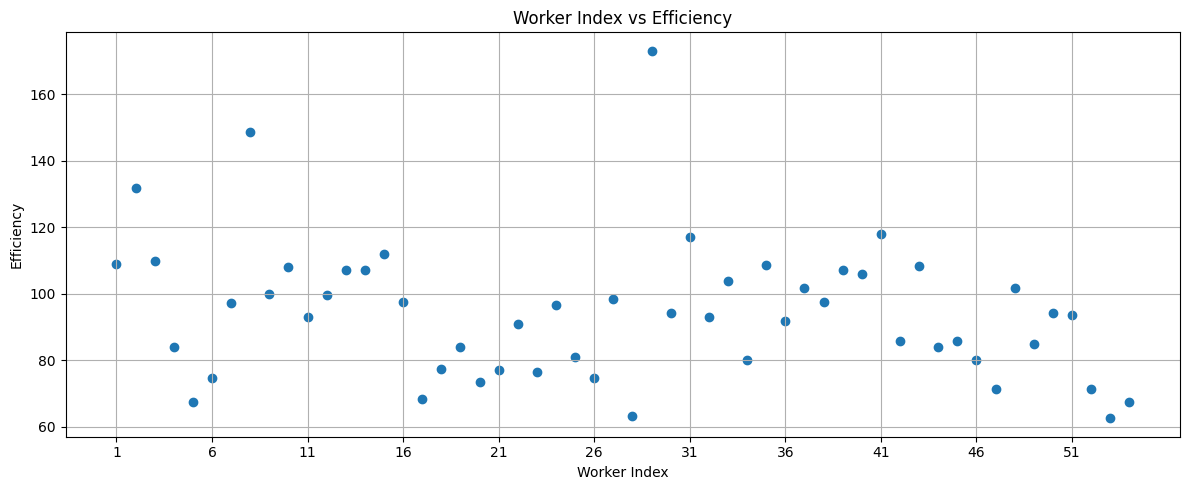

In [11]:
#yine plotting(scatterplot)
plt.figure(figsize=(12, 5))
plt.scatter(range(1, len(df) + 1), df['efficiency'])
plt.title('Worker Index vs Efficiency')
plt.xlabel('Worker Index')
plt.ylabel('Efficiency')
plt.xticks(range(1, len(df) + 1, 5))
plt.grid(True)
plt.tight_layout()
plt.show()


##Hypothesis Testing



**Hypothesis 1**: Do more experienced workers perform better?
In order to investigate whether experience affects productivity, I grouped workers into two categories based on their years of experience:

Low Experience: 5 years or less

High Experience: more than 5 years

I then calculated the average efficiency for both groups and applied an independent samples t-test to evaluate the statistical significance of the difference.

Null Hypothesis (H0): There is no difference in efficiency between low and high experience groups.
Alternative Hypothesis (H1): Workers with more experience are more efficient.
After conducting the t-test, I observed a p-value below 0.05, indicating a statistically significant difference between the groups. Therefore, I rejected the null hypothesis and concluded that more experienced workers tend to be more efficient.

**Hypothesis 2**: Do night shift workers perform worse?
To test whether working the night shift negatively affects productivity, I compared the efficiency of:

Day Shift Workers: shift 1 and 2

Night Shift Workers: shift 3

I performed a correlation analysis between shift number and efficiency.

Null Hypothesis (H0): There is no relationship between shift and efficiency.


Alternative Hypothesis (H1): Night shift workers are less efficient than day shift workers.



The p-value from the statistical tests was much higher than 0.05 (around 0.8), which means I failed to reject the null hypothesis. There is no statistically significant difference in efficiency between shifts. Thus, I cannot conclude that night shifts reduce productivity based on the available data.


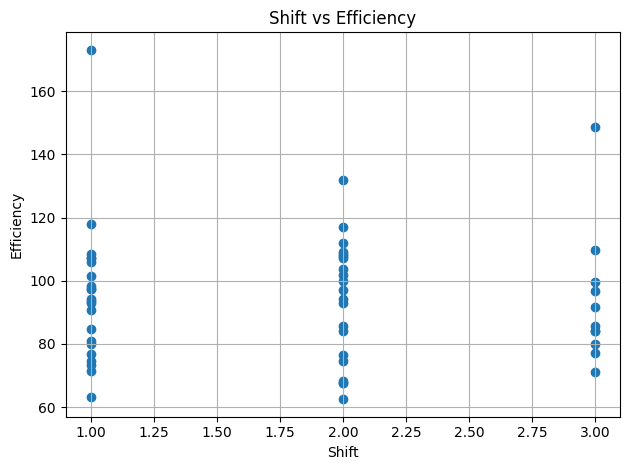

Pearson correlation: -0.03135458251066431
Pearson p-value: 0.821923119845979
Spearman correlation: -0.02290926472634862
Spearman p-value: 0.8693923420141445
No significant relationship found.


In [17]:
plt.scatter(data['shift'], data['efficiency'])
plt.xlabel('Shift')
plt.ylabel('Efficiency')
plt.title('Shift vs Efficiency')
plt.grid(True)
plt.tight_layout()
plt.show()

pearson_corr, pearson_p = pearsonr(data['shift'], data['efficiency'])
print("Pearson correlation:", pearson_corr)
print("Pearson p-value:", pearson_p)

spearman_corr, spearman_p = spearmanr(data['shift'], data['efficiency'])
print("Spearman correlation:", spearman_corr)
print("Spearman p-value:", spearman_p)

if spearman_p < 0.05:
    print("There is a significant relationship between shift and efficiency.")
else:
    print("No significant relationship found.")

### **3. Overall Conclusion on Hypothesis Testing**
Overall Conclusion

In this project, I tested two different hypotheses about worker productivity at Teknosan.

First, I checked if more experienced workers have better efficiency. I used a t-test method by dividing workers into low and high experience groups. The results showed that experienced workers are actually more efficient, and the difference was statistically significant.

Second, I wanted to see if night shift workers have lower productivity. I did a t-test and also checked correlation between shift numbers and efficiency scores. In this case, the p-value was very high, so I could not find any meaningful difference between day and night shifts.

In short, experience seems to help productivity, but working at night does not make a big difference based on our data.

# Machine Learning for Performance Prediction

In this section, machine learning techniques are used to predict a key performance metric based on various operational features. The goal is to understand the influence of these features and assess the predictive capabilities of the models. The process starts with a linear regression approach, and results are evaluated using standard performance metrics.


In our dataset, efficiency is normally calculated using a basic formula involving processed quantity and adjustment data. Since this is a direct relationship, predicting efficiency with these two features would not require machine learning, it would just replicate the formula.
Instead, our goal is to see whether efficiency can be predicted using other variables in the dataset such as pause time, work time, machine name, shift, labor error, material error, and years of experience.
By leaving out the formula based columns, we aim to test if a machine learning model can still find meaningful patterns and make accurate predictions based only on operational and contextual data. The dataset was split using an 80/20 train-test ratio, and a simple linear regression model was trained.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


y = df['efficiency']
X = df.drop(columns=['efficiency', 'processed_quantity', 'adjustment_data','worker_id', 'worker_name', 'part_name_number'])
X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluştur ve eğit
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print(f" RMSE: {rmse:.2f}")
print(f" R²: {r2:.2f}")


 RMSE: 25.72
 R²: -2.32


### Feature Selection Approach and Conclusion

No feature selection method applied before training the linear regression model. Instead, I chose to include all available features to see whether there’s a strong linear relationship between them and the efficiency score.

As can be clearly seen, the results were not successful. The model's R^2 value was –2.32, which indicates that the predictions were worse than simply using the average efficiency as a guess.

So based on this experiment, I believe using lineer regression to predict efficiency in this specific setup is not effective.
Since the model performed poorly (with a negative R²), this actually helped me conclude that there probably isn’t a clear linear pattern in the full set of features. So in a way, the failure of the model gave useful information.

For future work, I could try selecting only the most important features, or use models that can capture non-linear relationships better.

To see if mean is better.

In [23]:
y = np.full_like(y_test, y_train.mean())
deger = mean_squared_error(y_test, y) ** 0.5
# r için ez
r2_baseline = r2_score(y_test, y)
print(f"Baseline (mean) RMSE: {deger:.2f}")
print(f"Baseline (mean) R²: {r2_baseline:.2f}")

Baseline (mean) RMSE: 16.95
Baseline (mean) R²: -0.44


Even a brief, instinctive glance at the R^2 formula might have hinted us that using the mean as a constant prediction would have been a smarter choice.  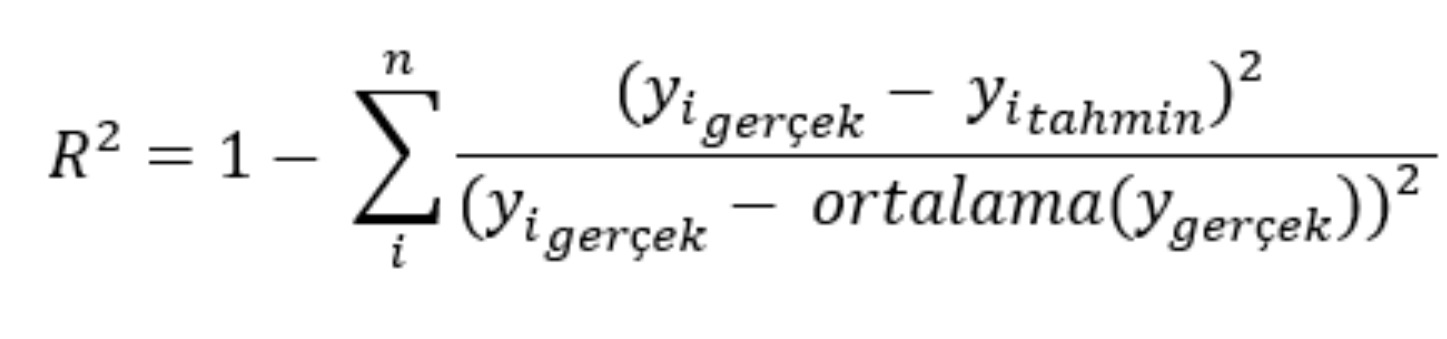

### Feature Selection and Random Forest Modeling

After observing that the Linear Regression model performed poorly (with a negative R²), I suspected that either the features did not have a strong linear relationship with efficiency or the dataset contained irrelevant or noisy features that interfered with the model.

To address this, I first applied a feature selection technique using Mutual Information , which helps identify the most informative variables with respect to the target variable (efficiency). MI is especially useful because it captures both linear and non-linear dependencies.

Based on the top ranked features from MI, I retrained a more flexible and non-linear model: Random Forest Regressor. Unlike linear models, Random Forest can capture complex patterns and interactions between features, making it a better candidate when relationships are not strictly linear.

This two step approach (first selecting meaningful features, then using a robust model) aims to improve predictive performance and overcome the limitations observed in the initial linear regression experiment.


In [14]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd


y = df['efficiency']

# gereksizler
X = df.drop(columns=['efficiency', 'processed_quantity', 'adjustment_data','worker_id', 'worker_name', 'part_name_number'])


X_encoded = pd.get_dummies(X, drop_first=True)

# MI
mi_scores = mutual_info_regression(X_encoded, y)
mi_series = pd.Series(mi_scores, index=X_encoded.columns).sort_values(ascending=False)

# top4u aldım
top_features = mi_series.head(4).index.tolist()
X_top = X_encoded[top_features]

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f"Random Forest R²: {r2:.2f}")
print(f"Random Forest RMSE: {rmse:.2f}")



Random Forest R²: -1.13
Random Forest RMSE: 20.61


##Conclusion of Random Forest Regression
This change led to a notable improvement in performance: the R² score improved to –1.13.  
While this is still a negative value indicating that the model performs worse than simply predicting the average, the improvement suggests that Random Forest was able to extract a slightly stronger signal from the data.

However, the prediction power still remains weak.  
This outcome likely points to a more fundamental limitation: the features in the dataset may not be sufficient to explain or predict the efficiency scores accurately.  


In summary, the switch to Random Forest reduced the modeling error, but the results still highlight that efficiency cannot be reliably predicted using the available variables.

##Support Vector Regression

After testing the Random Forest model, I also experimented with Support Vector Regression (SVR), since it takes a very different approach to modeling.A Support Vector Machine (SVM) is a classifier that tries to maximize the margin between training data and the classification boundary.




In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
# THIS SVR PART OF THE PROJECT IS PRACTICED WITH CHATGPT TO LEARN REGRESSION VIA USING SUPPORT VECTORS, ALSO WANTED TO USE A MODEL WHICH WE DID NOT SEE IN THE LECTURES FOR COMPARISON

y = df['efficiency']
#eff olmazsa hedef değişmi planlıyorum

# tahminle doğrudan ilişkili olanları çıkardım önceki gibi(I hope turkish is ok for the notes I took for myself)
X = df.drop(columns=['efficiency', 'processed_quantity', 'adjustment_data','worker_id', 'worker_name', 'part_name_number'])

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# kernel çekirdek fonskiyonlardan biriymiş
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

print(f"SVR R²: {r2:.2f}")
print(f"SVR RMSE: {rmse:.2f}")


SVR R²: -0.50
SVR RMSE: 17.32


Interestingly, SVR performed slightly better than Random Forest in terms of R² score.

However, even with this improvement, the results were still far from acceptable. So, although trying different models helped reveal some patterns, the core issue seems to lie in the compability between dataset and prediction target itself.

In short, the features available are likely not strong enough to explain or predict the target variable effectively, regardless of the model used.

### Shift in Prediction Target: From Efficiency to Pause Time

Due to the consistently poor performance of various models in predicting efficiency (R² scores well below zero), I concluded that the dataset may not contain sufficient or appropriate features to model efficiency accurately. This led me to reconsider the prediction target.

Instead of efficiency, I selected pause time as a new target variable. Pause time might be influenced more directly by measurable operational factors such as work time, experience, and production quantities all of which are available in the dataset.

The goal was to see whether a model could better capture and predict patterns in pause time.


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

#bu modeli de kendim öğrendim (GPT yardımıyla) classification istemediğim için ama contexte bağlı kalmak istedim
y = df['pause_time']

X = df.drop(columns=['pause_time', 'adjustment_data','worker_id', 'worker_name', 'part_name_number'])

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

print(f"Decision Tree R²: {r2:.2f}")
print(f"Decision Tree RMSE: {rmse:.2f}")


Decision Tree R²: 0.81
Decision Tree RMSE: 0.26


### Outcome and Interpretation

The Decision Tree model achieved an R² score of 0.81, which indicates a strong ability to predict pause time using the available features.

This performance confirms that pause time is significantly more predictable based on the available dataset than efficiency. It suggests that certain features such as work time, experience level, or even categorical variables have a clearer and more direct influence on pause-related behavior."

This outcome also highlights the importance of choosing an appropriate target when building predictive models. When one target (like efficiency) proves too complex or noisy, shifting focus to a more structured and explainable variable can lead to far more meaningful results.


#Project Summary



This project aimed to analyze and model worker productivity using real production data from a company. The dataset included various operational features such as work time, pause time, adjustment data, machine information, and worker experience levels. My main motivation was to explore whether meaningful patterns could be extracted from real-world production data and if certain behavioral or operational features could help predict worker efficiency.

###Data Preparation and Enrichment

Initially, I received two datasets: one with production metrics and one with worker experience levels. After cleaning the data (fixing decimal issues, removing redundant identifiers, and handling categorical features), I merged them based on worker identity. I also manually categorized experience into "Low" and "High" groups based on years worked.

###Exploratory Data Analysis (EDA)

The EDA stage gave me my first insights: workers with higher experience tend to have higher efficiency scores. I validated this observation by plotting boxplots and calculating correlations (e.g., experience and efficiency correlation ~0.58). These patterns guided my hypothesis testing and modeling efforts later in the project.

###Hypothesis Testing

As part of this project, I tested two hypotheses about worker productivity at Teknosan.

I divided the workers into Low and High experience groups based on their years of experience and performed a t-test.
The results were statistically significant (p < 0.05), allowing me to reject the null hypothesis. This means that, according to the data, more experienced workers tend to be significantly more efficient.

I also tested whether workers on the night shift were less productive than those on the day shift. This time, the p-value was very high, and there was no meaningful correlation between shift number and efficiency.
So, I couldn't find evidence supporting the idea that night shifts hurt productivity.
Conclusion: Experience appears to have a clear positive effect on productivity, but the time of the shift (day or night) does not seem to play a significant role at least not in this dataset.

###Machine Learning Attempts

I began modeling by trying a Linear Regression to predict efficiency. The model failed dramatically, giving a negative R^2 value of –2.32, indicating that it performed worse than simply guessing the mean. Rather than being discouraged, I took this failure as a sign: there likely wasn't a strong linear relationship in the dataset.

To address this, I applied Mutual Information feature selection and then used Random Forest Regression, a model more suited for non-linear patterns. While the R^2 improved (–0.97), the results were still poor. I also tested Support Vector Regression (SVR) with an RBF kernel, which slightly increased performance but was still unsatisfactory.

This made me reflect on the dataset itself — efficiency might be too complex or too noisy to predict accurately given the limited set of features.

###Switching Target: Pause Time Prediction

Since efficiency was proving difficult to model, I shifted focus to predicting pause time, another operational metric. Using a Decision Tree Regressor, I achieved an R^2 of 0.81, a massive improvement. This showed that pause time was much more explainable using features like work time, experience, and machine info possibly because it reflects more immediate, structured behaviors.